In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print(iris_df.info())
print(iris_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2   

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
df = pd.read_csv('/content/drive/MyDrive/IRIS.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
count,151,151,151,151,151
unique,36,24,44,23,4
top,5,3,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [16]:
!pip install --upgrade seaborn


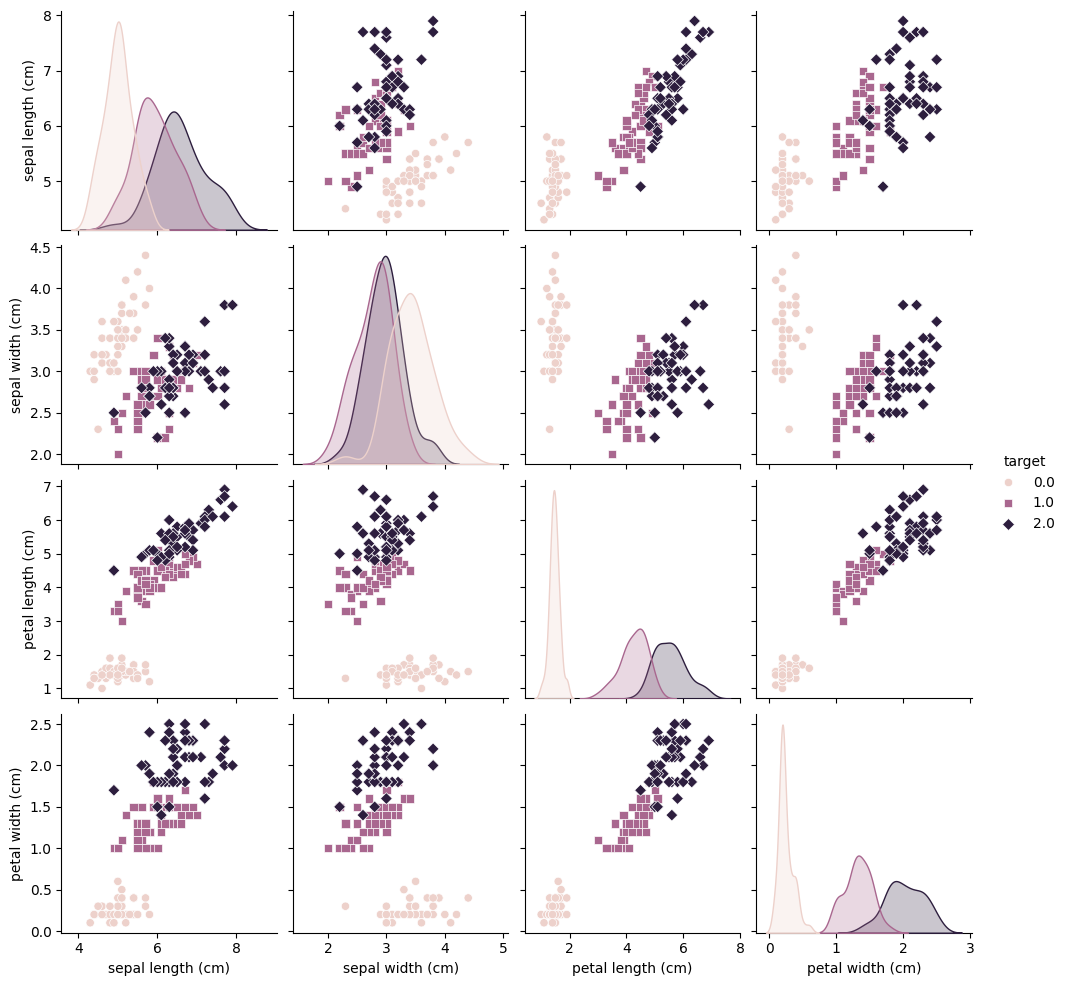

In [23]:
# Pairplot for visualization
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()


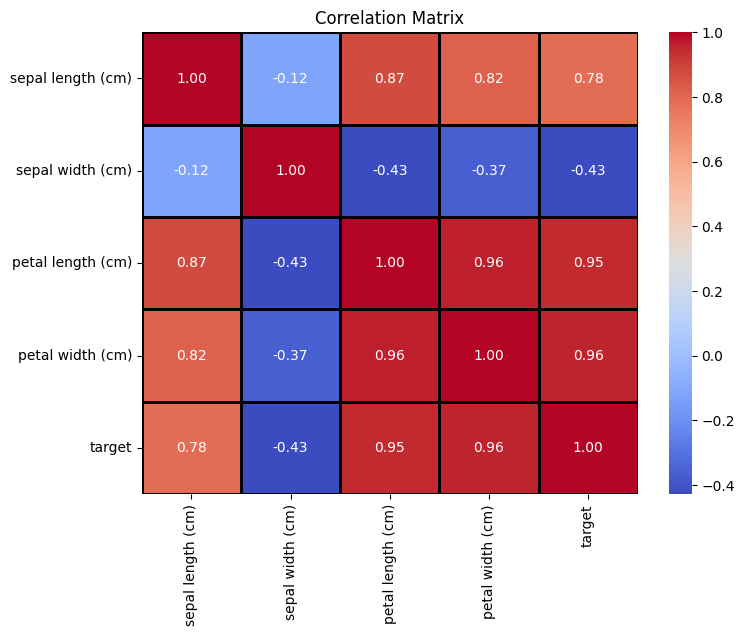

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

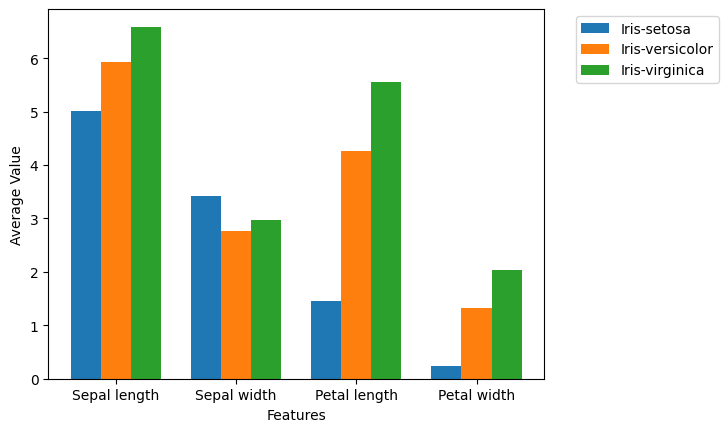

In [36]:
import numpy as np
import matplotlib.pyplot as plt

columns = df.columns[:-1]


for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
data = df.values
X = data[:, :-1]
Y = data[:, -1]
unique_classes = np.unique(Y)
Y_Data = np.array([[np.mean(X[:, i][Y == cls]) for i in range(X.shape[1])] for cls in unique_classes])
X_axis = np.arange(len(columns))
width = 0.25

for i, cls in enumerate(unique_classes):
    plt.bar(X_axis + i * width, Y_Data[i], width, label=cls)
plt.xticks(X_axis + width * (len(unique_classes) - 1) / 2, columns)
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [27]:
# Split the data into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

